# Applied Data Science 1
### Module Leader: Dr. William Cooper
## Distributions
Expanding on our basic statistics, let's think here about distributions.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss

In [2]:
x_uniform = np.linspace(ss.uniform.ppf(0.01), ss.uniform.ppf(0.99), 1000)
x_normal = np.linspace(ss.norm.ppf(0.01), ss.norm.ppf(0.99), 1000)
x_lognormal = np.linspace(ss.lognorm.ppf(0.01, 1), ss.lognorm.ppf(0.99, 1), 1000)
x_exp = np.linspace(ss.expon.ppf(0.01), ss.expon.ppf(0.99), 1000)

y_uniform = ss.uniform.pdf(x_uniform)
y_normal = ss.norm.pdf(x_normal)
y_lognormal = ss.lognorm.pdf(x_lognormal, 1)
y_exp = ss.expon.pdf(x_exp)

x_distributions = (x_uniform, x_normal, x_lognormal, x_exp)
y_distributions = (y_uniform, y_normal, y_lognormal, y_exp)
distributions = ('Uniform', 'Normal', 'Lognormal', 'Exponential')

In [3]:
def plot_distributions():
    """
    Plots the four distributions, uniform, normal, lognormal and exponential
    """
    fig, axs = plt.subplots(2, 2, dpi=144)
    axs = axs.flatten()
    
    for i, dist in enumerate(distributions):
        axs[i].plot(x_distributions[i], y_distributions[i], 'k-')
        axs[i].set_title(dist)
        axs[i].set_yticks(np.arange(0, 1.5, 0.5))

    fig.supxlabel('x')
    fig.supylabel('y')
    fig.subplots_adjust(hspace=0.5)
    plt.show()
    return

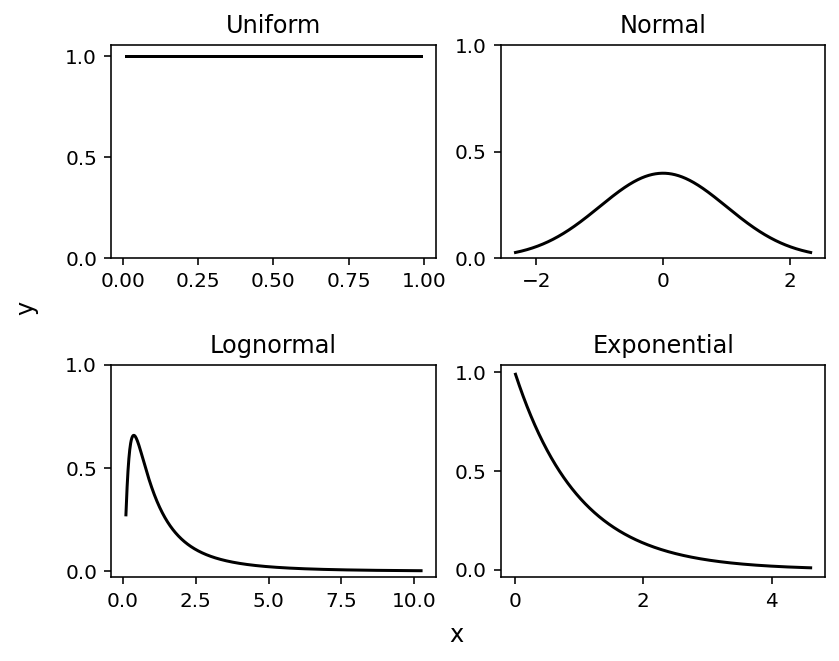

In [4]:
plot_distributions()

These are the probability density functions, but what about the cumulative distributions?

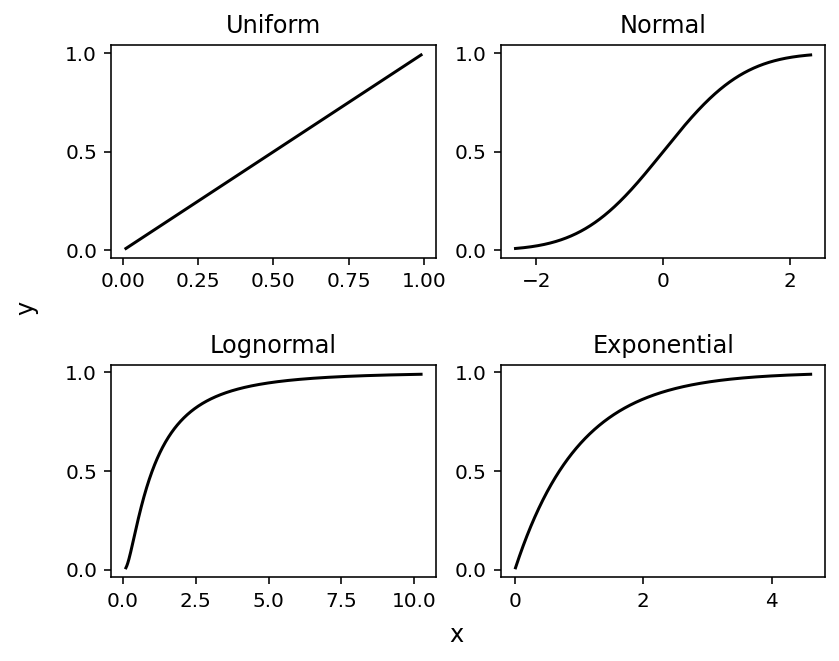

In [5]:
y_uniform = ss.uniform.cdf(x_uniform)
y_normal = ss.norm.cdf(x_normal)
y_lognormal = ss.lognorm.cdf(x_lognormal, 1)
y_exp = ss.expon.cdf(x_exp)

y_distributions = (y_uniform, y_normal, y_lognormal, y_exp)
plot_distributions()

Focusing just on the normal distribution, this can be modified by the four statistical moments.
Let's look at the first moment:

$$\mu_1 = \int_{-\infty}^\infty x^1 F(x)\,dx 
                    = \frac{1}{T} \sum_{i=1}^T x_i^1 $$
    
    
The sum is just the well known expression for the average $\overline{x}$.
Carrying out the integration over the normal distribution:

$$N(x;a,\sigma) = \frac{1}{\sqrt{2\pi} \sigma}
                   \exp\left(-\frac{1}{2}\,\frac{(x-a)^2}{\sigma^2}\right)$$
results in the peak (average) value $a$.


The 2nd moment is

$$\mu_2 = \int_{-\infty}^\infty x^2 F(x)\,dx
          = \frac{1}{T} \sum_{i=1}^T x_i^2  $$
          
However, it is often preferred to look at the *centralised* 2nd and higher 
moments, because they often carry more meaningful information.

$$\mu_{2}^{\mathrm{(c)}}
               = \int_{-\infty}^\infty (x-\overline{x})^2 F(x)\,dx
               = \frac{1}{T} \sum_{i=1}^T (x_i-\overline{x})^2$$  

Carrying out this integration for the normal distribution
gives the variance $\sigma^2$.

In [6]:
norm = ss.norm(loc=1, scale=2)
x_normal = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 1000)
y_normal = norm.pdf(x_normal)
mean = norm.mean()
std = norm.std()

In [7]:
def plot_normal():
    """
    Plots the normal distribution
    """
    plt.figure(dpi=144)

    plt.plot(x_normal, y_normal, 'k-')

    plt.axvline(x=mean, color='k', linestyle='--', label='Mean')
    plt.text(mean-std, plt.ylim()[1]*0.9, f'$\mu$: {mean:0g}', horizontalalignment='right')

    plt.annotate('', xy=(mean-std, norm.pdf(mean-std)), xytext=(mean+std, norm.pdf(mean+std)), 
                 arrowprops=dict(arrowstyle='<->', lw=1))
    plt.text(mean-0.5*std, norm.pdf(mean-std)+0.01, f'$\sigma$: {std:0g}', horizontalalignment='center')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    return

<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_37855/440898690.py:10: SyntaxWarning: invalid escape sequence '\m'
  plt.text(mean-std, plt.ylim()[1]*0.9, f'$\mu$: {mean:0g}', horizontalalignment='right')
/tmp/ipykernel_37855/440898690.py:14: SyntaxWarning: invalid escape sequence '\s'
  plt.text(mean-0.5*std, norm.pdf(mean-std)+0.01, f'$\sigma$: {std:0g}', horizontalalignment='center')


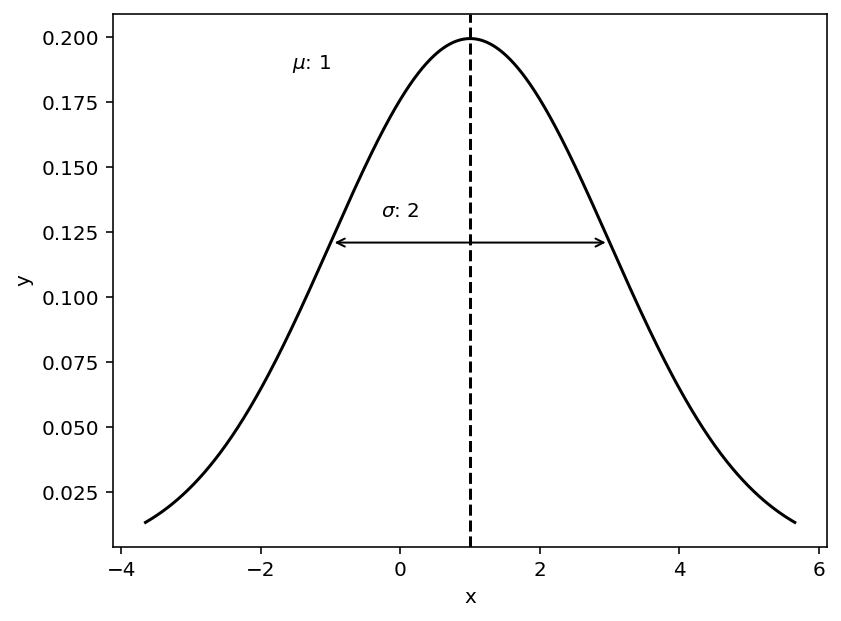

In [8]:
plot_normal()

The 3rd moment is

$$\mu_3 = \int_{-\infty}^\infty x^3 F(x)\,dx
          = \frac{1}{T} \sum_{i=1}^T x_i^3  $$
          
It is usual to look at the *centralised and normalised* 3rd and higher
moments. That gives a number, which allows us to interpret the relevant property
of the distributions, independent of average and variance.

$$\mu_{3}^{\mathrm{(n)}} 
     = \int_{-\infty}^\infty \left(\frac{x-\overline{x}}{\sigma}\right)^3 F(x)\,dx
     = \frac{1}{T} \sum_{i=1}^T \left(\frac{x_i-\overline{x}}{\sigma}\right)^3  $$
     
The result of this integration for the normal distribution is 0.

The third moment is called *skewness*. It measures the asymmetry of
distribution functions. The normal distribution is symmetric and has a
skewness of 0.


- *Skewness = 0*. The distribution is symmetric.
- *Skewness < 0*. Negative skew. Stronger left tail. The
  distribution is said to be *left-tailed* or *left skewed*. The average is larger than the median.
- *Skewness > 0*. Positive skew. Stronger right tail. The
  distribution is said to be *right-tailed* or *right skewed*. The average is smaller than the median.

Both distributions have identical average and variance.

The skewness of the normal distribution is 0.

In [9]:
skewnorm_p = ss.skewnorm(3, loc=1, scale=2)
x_skewnormal_p = np.linspace(skewnorm_p.ppf(0.01), skewnorm_p.ppf(0.99), 1000)
y_skewnormal_p = skewnorm_p.pdf(x_skewnormal_p)

skewnorm_n = ss.skewnorm(-3, loc=1, scale=2)
x_skewnormal_n = np.linspace(skewnorm_n.ppf(0.01), skewnorm_n.ppf(0.99), 1000)
y_skewnormal_n = skewnorm_n.pdf(x_skewnormal_n)

skew = norm.stats(moments='s')
skew_p = skewnorm_p.stats(moments='s')
skew_n = skewnorm_n.stats(moments='s')

In [10]:
def plot_skewed_normal():
    """
    Plots the skewed normal distribution
    """
    plt.figure(dpi=144)

    plt.plot(x_normal, y_normal, 'k-')
    plt.plot(x_skewnormal_p, y_skewnormal_p, 'b-')
    plt.plot(x_skewnormal_n, y_skewnormal_n, 'r-')

    plt.axvline(x=mean, color='k', linestyle='--', label='Mean')
    plt.text(mean-std, plt.ylim()[1]*0.9, f'$\mu$: {mean:0g}; Skew: {skew:0g}',
             horizontalalignment='right')

    plt.annotate('', xy=(mean-std, norm.pdf(mean-std)), xytext=(mean+std, norm.pdf(mean+std)), 
                 arrowprops=dict(arrowstyle='<->', lw=1))
    plt.text(mean-0.5*std, norm.pdf(mean-std)+0.01, f'$\sigma$: {std:0g}', horizontalalignment='center')

    plt.text(mean+2*std, plt.ylim()[1]*0.8, f'Skew: {skew_p:.2f}',
             horizontalalignment='right', color='b')
    plt.text(mean-std, plt.ylim()[1]*0.8, f'Skew: {skew_n:.2f}',
             horizontalalignment='right', color='r')


    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    return

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_37855/2297160792.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.text(mean-std, plt.ylim()[1]*0.9, f'$\mu$: {mean:0g}; Skew: {skew:0g}',
/tmp/ipykernel_37855/2297160792.py:17: SyntaxWarning: invalid escape sequence '\s'
  plt.text(mean-0.5*std, norm.pdf(mean-std)+0.01, f'$\sigma$: {std:0g}', horizontalalignment='center')


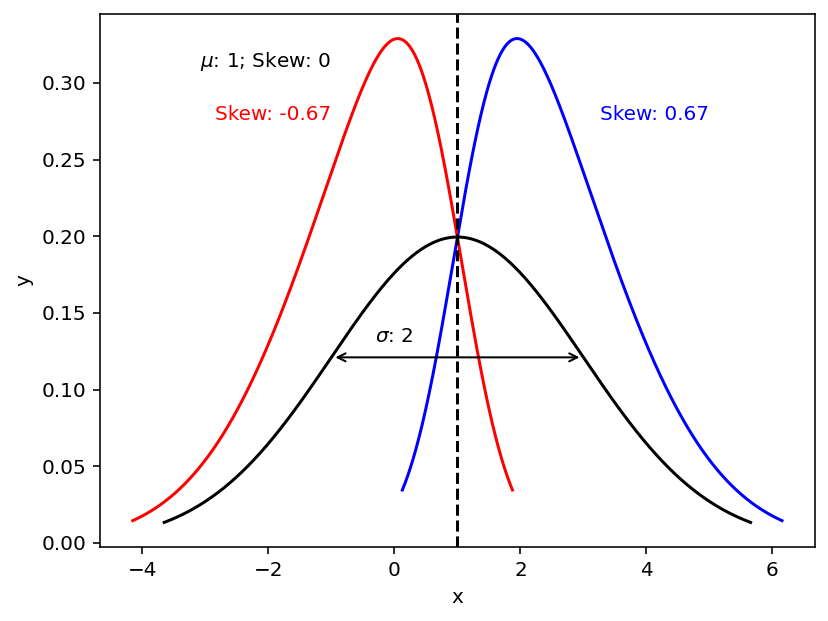

In [11]:
plot_skewed_normal()

The 4th moment is

$$\mu_4 = \int_{-\infty}^\infty x^4 F(x)\,dx
          = \frac{1}{T} \sum_{i=1}^T x_i^4 $$

Again, usually the *centralised and normalised* 4th moment is preferred.

$$\mu_{4}^{\mathrm{(n)}}  
     = \int_{-\infty}^\infty \left(\frac{x-\overline{x}}{\sigma}\right)^4 F(x)\,dx
     = \frac{1}{T} \sum_{i=1}^T \left(\frac{x_i-\overline{x}}{\sigma}\right)^4 $$

The result of this integration for the normal distribution is **3**. 

The fourth moment is called *kurtosis*. This is called *Pearson's kurtosis*.
It measures the strength of the tails. 

One is usually interested in the question whether the tails are
*stronger* or *weaker* than that of a normal distribution.
Thus, an *excess kurtosis* is defined.

$$\mathrm{Kurt} = \mu_{4}^{\mathrm{n}} -3$$

This is called *Fisher's kurtosis*. 

Always check the documentation for which version of skewness and kurtosis are used. Sometimes they are implemented with modifications for low-number statistics.


- *(Excess) kurtosis = 0*. The strengths of the tail is the
  same as for the normal distribution. The distribution is called *mesokurtic* (from Greek meso, meaning intermediate). In practical terms an
  empirical distribution with a skewness of 0 and an excess kurtosis of 0 is very likely normally
  distributed.

- *(Excess) kurtosis > 0*. The tails are stronger than for the
  normal distribution, the peak is steeper. These distributions are called
  *leptokurtic* (from Greek lepto, meaning narrow).

- *(Excess) kurtosis < 0*. The distribution has a broader,
  lower peak and thinner tails than the normal distribution. These
  distributions are called *platykurtic* (from Greek platy, meaning
  broad).

In [12]:
platy = ss.cosine(loc=1, scale=2)
x_platy = np.linspace(platy.ppf(0.01), platy.ppf(0.99), 1000)
y_platy = platy.pdf(x_platy)

lepto = ss.laplace(loc=1, scale=2)
x_lepto = np.linspace(lepto.ppf(0.01), lepto.ppf(0.99), 1000)
y_lepto = lepto.pdf(x_lepto)

kurt = norm.stats(moments='k')
platy_kurt = platy.stats(moments='k')
lepto_kurt = lepto.stats(moments='k')

In [13]:
def plot_excess_kurtosis_normal():
    """
    Plots the normal distribution against distributions with excess kurtosis
    """
    plt.figure(dpi=144)

    plt.plot(x_normal, y_normal, 'k-')
    plt.plot(x_platy, y_platy, 'b-')
    plt.plot(x_lepto, y_lepto, 'r-')

    plt.axvline(x=mean, color='k', linestyle='--', label='Mean')
    plt.text(mean-std, plt.ylim()[1]*0.9, f'$\mu$: {mean:0g}; Kurt: {kurt:0g}',
             horizontalalignment='right')

    plt.annotate('', xy=(mean-std, norm.pdf(mean-std)), xytext=(mean+std, norm.pdf(mean+std)), 
                 arrowprops=dict(arrowstyle='<->', lw=1))
    plt.text(mean-0.5*std, norm.pdf(mean-std)+0.01, f'$\sigma$: {std:0g}', horizontalalignment='center')

    plt.text(mean+2.5*std, plt.ylim()[1]*0.5, f'Kurt: {platy_kurt:.2f}',
             horizontalalignment='right', color='b')
    plt.text(mean-std, plt.ylim()[1]*0.8, f'Kurt: {lepto_kurt:.2f}',
             horizontalalignment='right', color='r')


    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    return

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_37855/1953810304.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.text(mean-std, plt.ylim()[1]*0.9, f'$\mu$: {mean:0g}; Kurt: {kurt:0g}',
/tmp/ipykernel_37855/1953810304.py:17: SyntaxWarning: invalid escape sequence '\s'
  plt.text(mean-0.5*std, norm.pdf(mean-std)+0.01, f'$\sigma$: {std:0g}', horizontalalignment='center')


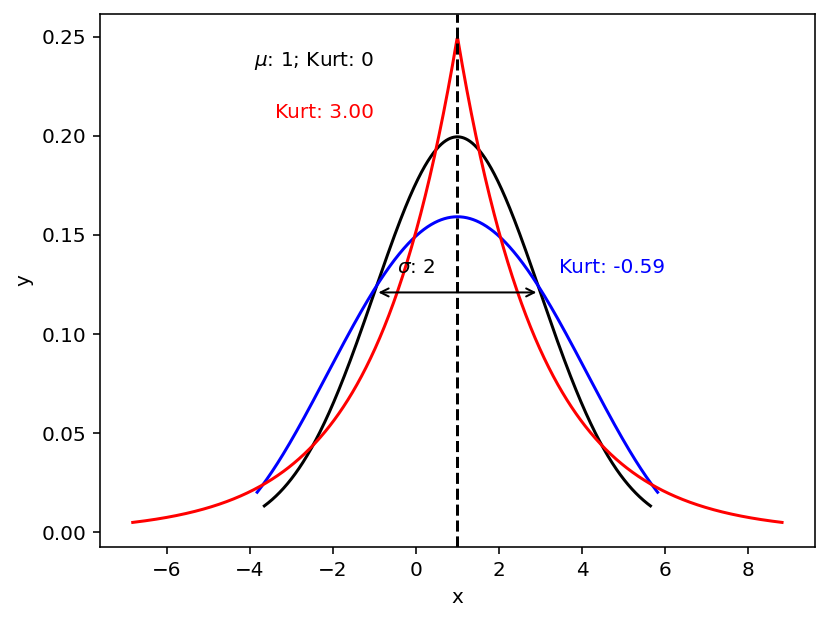

In [14]:
plot_excess_kurtosis_normal()

# Question 1
Load the *distributions* file, view some basic statistics, then, view them as histograms and print the 4 major statistical moments for each distribution (scipy.stats has inbuilt methods for skewness and kurtosis).
Set the range and number of bins of the histograms so they are a fair comparison.
What distributions do you think they are samplings of?

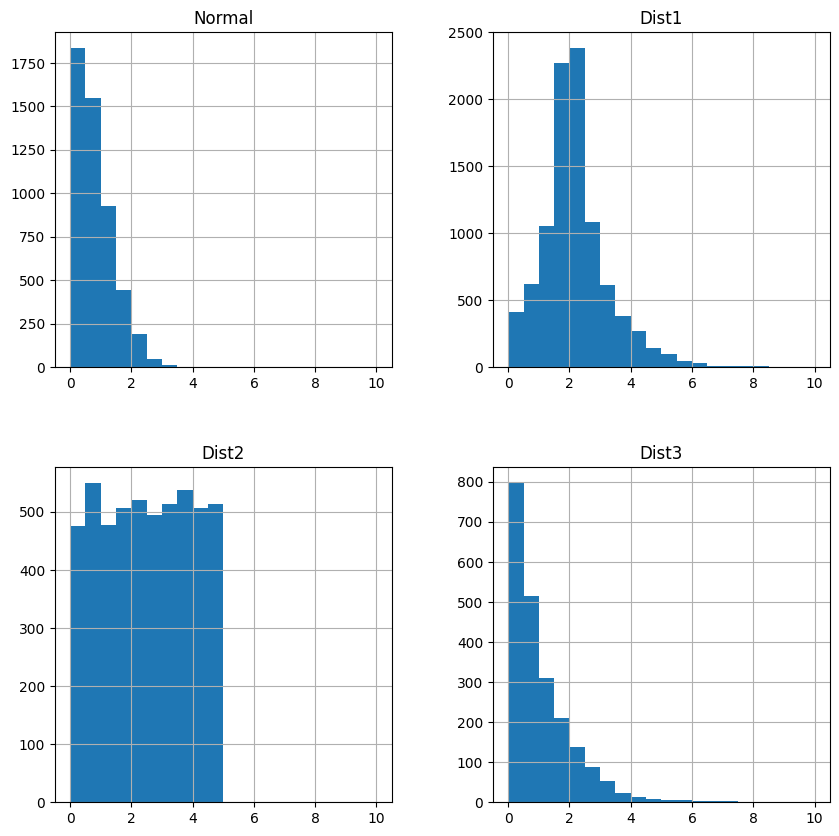

Normal:
Mean: 0.018062566186908085
Median: 0.0033195296421319
Skewness: 0.02397218295271387
Kurtosis: 0.0003765098919381593

Dist1:
Mean: 2.004507618451437
Median: 2.00249314714333
Skewness: -0.024257897133590587
Kurtosis: 2.7967433497920178

Dist2:
Mean: 0.07636912414529007
Median: 0.105046386435181
Skewness: -0.03735119815493056
Kurtosis: -1.185720743131554

Dist3:
Mean: -0.7984837131125863
Median: -0.997652912733422
Skewness: 1.2286353455127683
Kurtosis: 3.1728248367838194



In [32]:
# Question 1
# Load the *distributions* file, view some basic statistics, then, view them as histograms and print the 4 major statistical moments for each distribution (scipy.stats has inbuilt methods for skewness and kurtosis).
# Set the range and number of bins of the histograms so they are a fair comparison.
# What distributions do you think they are samplings of?

df_dists = pd.read_csv('distributions.csv')

def plot_distributions_hist():

    df_dists.hist(bins=20, range=(0, 10), figsize=(10, 10))
    plt.show()
    return

plot_distributions_hist()

for col in df_dists.columns:
    print(f'{col}:')
    print(f'Mean: {df_dists[col].mean()}')
    print(f'Median: {df_dists[col].median()}')
    print(f'Skewness: {ss.skew(df_dists[col])}')
    print(f'Kurtosis: {ss.kurtosis(df_dists[col])}')
    print()

# The distributions are:
# 1. Normal
# 2. Exponential
# 3. Lognormal
# 4. Uniform

In [33]:
def plot_file_distributions():
    """
    Plots the four distributions from the file
    """
    fig, axs = plt.subplots(2, 2, dpi=144)
    axs = axs.flatten()

    for i, col in enumerate(df_dists.columns):
        axs[i].hist(df_dists[col], bins=18, range=(-6, 12))
        axs[i].set_title(col)
    
    fig.supxlabel('x')
    fig.supylabel('y')
    fig.subplots_adjust(hspace=0.5)
    plt.show()
    return

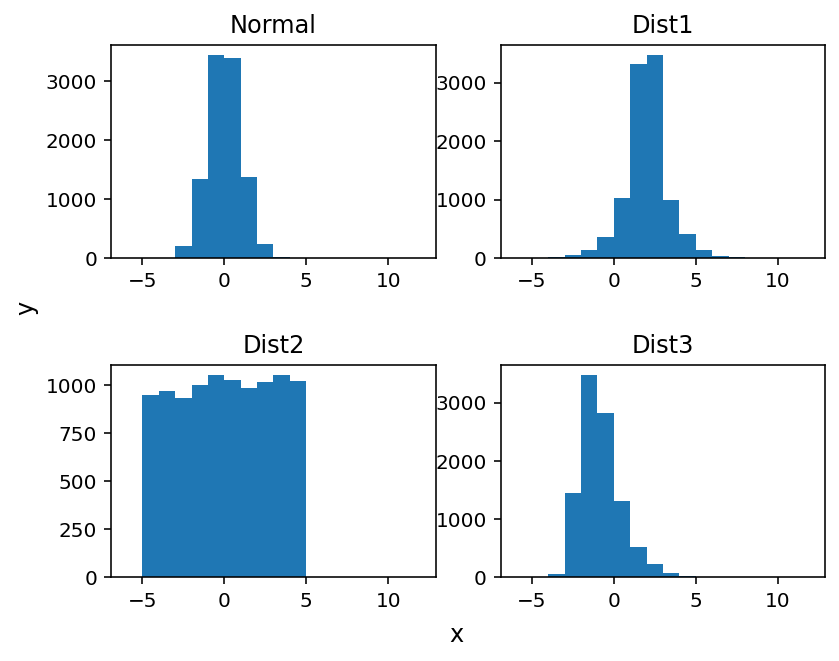

In [34]:
plot_file_distributions()

In [35]:
def print_stats(dist):
    """
    Prints the moments of each distribution
    """
    print(f'{dist}:')
    print(f'Mean: {df_dists[dist].mean()}')
    print(f'Median: {df_dists[dist].median()}')
    print(f'Skewness: {ss.skew(df_dists[dist])}')
    print(f'Kurtosis: {ss.kurtosis(df_dists[dist])}')
    print()
    return


In [36]:
for dist in df_dists.columns:
    print_stats(dist)
    

Normal:
Mean: 0.018062566186908085
Median: 0.0033195296421319
Skewness: 0.02397218295271387
Kurtosis: 0.0003765098919381593

Dist1:
Mean: 2.004507618451437
Median: 2.00249314714333
Skewness: -0.024257897133590587
Kurtosis: 2.7967433497920178

Dist2:
Mean: 0.07636912414529007
Median: 0.105046386435181
Skewness: -0.03735119815493056
Kurtosis: -1.185720743131554

Dist3:
Mean: -0.7984837131125863
Median: -0.997652912733422
Skewness: 1.2286353455127683
Kurtosis: 3.1728248367838194



## End Question 1

## Errors and Probabilities
Science needs uncertainties estimates when making statements, how do we do this for unknown datasets when looking at the statistical moments?

In [37]:
df_ftse = pd.read_csv('FTSE100_2022.csv', index_col='Date')
df_ftse.head()

,Close
Date,
18/03/22,7404.73
17/03/22,7385.34
16/03/22,7291.68
15/03/22,7175.70
14/03/22,7193.47


In [38]:
df_ftse.index = pd.to_datetime(df_ftse.index, format="%d/%m/%y")
df_ftse.sort_index(inplace=True)
df_ftse.head()

,Close
Date,
1984-01-03,997.500000
1984-01-04,998.599976
1984-01-05,1015.799988
1984-01-06,1029.000000
1984-01-09,1034.599976


In [39]:
def plot_ftse():
    """
    Plots the FTSE index
    """
    plt.figure(dpi=144)

    plt.step(df_ftse.index, df_ftse.Close)

    plt.xlabel('Date [year]')
    plt.ylabel('FTSE')
    plt.show()
    return

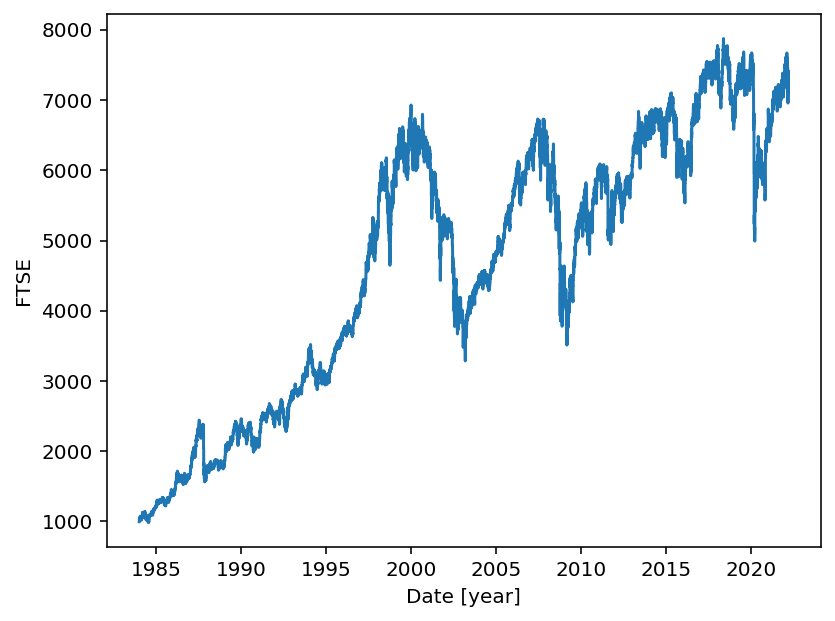

In [40]:
plot_ftse()

In [41]:
# Let's convert closing price into a return using a percentage change
df_ftse['Return'] = df_ftse['Close'].pct_change()
df_ftse.dropna(inplace=True)  # a shift introduces a NaN in the first N rows shifted by
df_ftse.head()

,Close,Return
Date,,
1984-01-04,998.599976,0.001103
1984-01-05,1015.799988,0.017224
1984-01-06,1029.000000,0.012995
1984-01-09,1034.599976,0.005442
1984-01-10,1034.300049,-0.000290


In [42]:
# Let's get uncertainties on our statistical moments
# Calculate 1 sigma bootstrapped confidence interval for average
data = (df_ftse["Return"].to_numpy(), )
sigma = ss.bootstrap(data, np.mean, confidence_level=0.682).standard_error

aver = np.mean(df_ftse["Return"])
print("Mean =  ", np.round(aver, 6), " +/-", np.round(sigma, 6), 
      "   significance level ", np.round(np.abs(aver / sigma), 3))

# Calculate 1 sigma bootstrapped confidence interval for std. deviation
sigma = ss.bootstrap(data, np.std, confidence_level=0.682).standard_error

std = np.std(df_ftse["Return"])
print("Std. dev = ", np.round(std, 6), " +/-", np.round(sigma, 6), 
      "   significance level", np.round(np.abs(std / sigma), 3))

# Calculate 1 sigma bootstrapped confidence interval for skew
sigma = ss.bootstrap(data, ss.skew, confidence_level=0.682).standard_error

skewness = ss.skew(df_ftse["Return"])
print("Skewness = ", np.round(skewness, 6), " +/-", np.round(sigma, 6), 
      "   significance level ", np.round(np.abs(skewness / sigma), 3))

# Calculate 1 sigma bootstrapped confidence interval for kurtosis
sigma = ss.bootstrap(data, ss.kurtosis, confidence_level=0.682).standard_error

kurtosis = ss.kurtosis(df_ftse["Return"])
print("Kurtosis = ", np.round(kurtosis, 6), " +/-", np.round(sigma, 6), 
      "   significance level ", np.round(np.abs(kurtosis / sigma), 3))

Mean =   0.00026  +/- 0.000109    significance level  2.384
Std. dev =  0.01083  +/- 0.000186    significance level 58.202
Skewness =  -0.372461  +/- 0.250486    significance level  1.487
Kurtosis =  9.804102  +/- 1.877773    significance level  5.221


Normal distribution
$$ N(x) = \frac{1}{\sqrt{2\pi} \sigma}
     \exp\left(-\frac{1}{2} \left(\frac{x-\mu}{\sigma}\right)^2 \right)$$

The probability of values falling in the $-1 \sigma$ and $+1 \sigma$ range is 
$$\int_{\mu -\sigma}^{\mu+\sigma} N(x)\,dx = 0.682$$

| sigmas | probability | significance $\frac{x-\mu}{\sigma} > n$ |
| -------- | -------- | -------- |
| 1 | 0.682 | 0.318 |
| 2 | 0.954 | 0.046 |
| 3 | 0.997 | 0.003 |
| 5 | 0.9999994267 | $5.73\cdot 10^{-7}$ |

The chance of a $5 \sigma$ deviation is 1 in 1,744,278. A $5 \sigma$ deviation is highly significant. E.g. requirement by CERN to announce a new particle. Physical sciences in general consider $3 \sigma$ results significant. One should at least require a significance of 5%.

# Question 2
Amend the print_stats function from Question 1, to also include these bootstrapped errors.
Run as before (beware this can take a while).

In [45]:
def print_stats(dist):
    """
    Prints the moments of each distribution
    """
    
    data = (df_dists[dist].to_numpy(), )
    sigma = ss.bootstrap(data, np.mean, confidence_level=0.682).standard_error
    aver = np.mean(df_dists[dist])
    print(f'Mean: {aver:0.6f} +/- {sigma:0.6f}   significance level {np.abs(aver/sigma):0.3f}')
    
    sigma = ss.bootstrap(data, np.std, confidence_level=0.682).standard_error
    std = np.std(df_dists[dist])
    print(f'Std. dev: {std:0.6f} +/- {sigma:0.6f}   significance level {np.abs(std/sigma):0.3f}')

    sigma = ss.bootstrap(data, ss.skew, confidence_level=0.682).standard_error
    skewness = ss.skew(df_dists[dist])
    print(f'Skewness: {skewness:0.6f} +/- {sigma:0.6f}   significance level {np.abs(skewness/sigma):0.3f}')

    sigma = ss.bootstrap(data, ss.kurtosis, confidence_level=0.682).standard_error
    kurtosis = ss.kurtosis(df_dists[dist])
    print(f'Kurtosis: {kurtosis:0.6f} +/- {sigma:0.6f}   significance level {np.abs(kurtosis/sigma):0.3f}')
    print()
    
    return

In [48]:
for dist in df_dists.columns:
    print_stats(dist)


Mean: 0.018063 +/- 0.010132   significance level 1.783
Std. dev: 1.001658 +/- 0.007081   significance level 141.448
Skewness: 0.023972 +/- 0.024404   significance level 0.982
Kurtosis: 0.000377 +/- 0.049529   significance level 0.008

Mean: 2.004508 +/- 0.012739   significance level 157.348
Std. dev: 1.283651 +/- 0.014027   significance level 91.514
Skewness: -0.024258 +/- 0.064806   significance level 0.374
Kurtosis: 2.796743 +/- 0.177626   significance level 15.745

Mean: 0.076369 +/- 0.028722   significance level 2.659
Std. dev: 2.874122 +/- 0.012841   significance level 223.831
Skewness: -0.037351 +/- 0.014364   significance level 2.600
Kurtosis: -1.185721 +/- 0.011809   significance level 100.406

Mean: -0.798484 +/- 0.012642   significance level 63.161
Std. dev: 1.278675 +/- 0.014592   significance level 87.627
Skewness: 1.228635 +/- 0.079674   significance level 15.421
Kurtosis: 3.172825 +/- 0.698817   significance level 4.540



## End Question 2

## Good Coding Practice
Read, and become comfortable with, [PEP 8](https://pep8.org/).

To summarise some of the most important features:
- Spaces, not tabs, and 4 spaces per indent level (e.g. in functions)
- Keep lines less than 80 characters long
- Two empty lines between top-level functions/classes (only one between class methods)
- Scripts should be in order: imports > functions/classes > main program
- Imports should be grouped by their type (standard library/external library/local libraries)
- Spaces around binary/assignment/Boolean/commas operators (unless it makes things harder to read, e.g. keywords)
- Comments should come above code and well-explain what it does, logical blocks also good
- Docstrings should be in all non-dunder functions/classes

# Question 3
Fix up the following code:

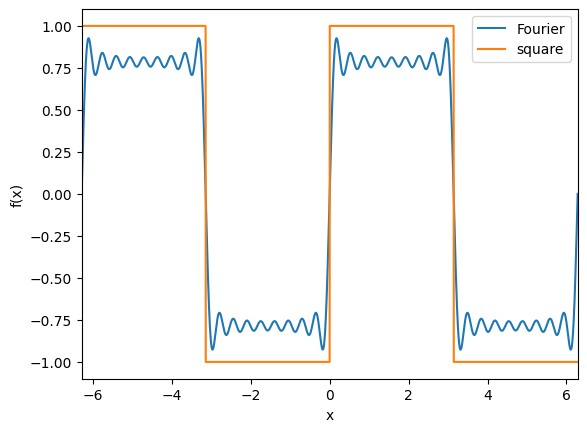

In [ ]:
def fsquare(x, l):
    # Calculates an approximation of a square wave using a Fourier series
    # Terms are added until a reasonable approximation is achieved.
    # x: x-values
    # l: length of the period
    
    f= nterm(x, l, 1) + nterm(x, l, 3) + nterm(x, l, 5) + nterm(x, l, 7) + nterm(x, l, 9) + nterm(x, l, 11) + nterm(x, l, 13) + nterm(x, l, 15) + nterm(x, l, 17)

    return f
def nterm(x, l, n): 
    """ Calculates the nth term of the Fourier series. l is the period 
        length 
    """
    t = np.sin(2.0*n*np.pi*x /l ) / n
    
    return t


def square(x, l):
    """ Calculates an accurate square wave of period length l. """
    
    # calculate a sine wave
    f = np.sin(x)
    # use the sign function (+1 for positive numbers, -1 for negative numbers
    # to convert into a suqare wave
    f = np.sign(f)
    
    return f

    
l = 2.0*np.pi    # wavelength of the square wave
x=np.linspace(-2.0*np.pi,2.0*np.pi,10000)

plt.figure()

# plot square wave and approximation
plt.plot(x, fsquare(x, l), label = "Fourier")
plt.plot(x, square(x, l), label = "square")

plt.xlim(-2.0*np.pi, 2.0*np.pi)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

plt.show()

